In [1]:
import pandas as pd
import requests 
import json
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns
import time
import gmaps
from google import key

In [4]:
master_data = "../Data/clean/master_data_unis.csv"

In [7]:
master_data_stadium = pd.read_csv(master_data)

In [8]:
master_data_stadium.head()

,Unnamed: 0,City,State,lat,long,Metro,County,2010-12,2011-12,2012-12,...,2017-12,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019_Avg,State_abbrev,Universities
0,0,Round Rock,Texas,30.5252,-97.6660,Austin-Round Rock,Williamson County,NaN,794.5,805.0,...,991.0,1063.5,1042.5,1015.0,1000.0,1020.0,1050.0,1025.5,TX,0
1,1,Tampa,Florida,27.9701,-82.4797,Tampa-St. Petersburg-Clearwater,Hillsborough County,NaN,NaN,NaN,...,1381.0,1476.5,1432.0,1440.0,1435.0,1480.0,1499.0,1457.2,FL,11
2,2,Scottsdale,Arizona,33.6843,-111.8611,Phoenix-Mesa-Scottsdale,Maricopa County,NaN,NaN,NaN,...,1268.0,1429.0,1418.5,1406.0,1365.0,1479.0,1450.0,1423.7,AZ,7
3,3,Oakland,California,37.7698,-122.2257,San Francisco-Oakland-Hayward,Alameda County,NaN,NaN,NaN,...,2200.0,2997.5,2910.0,3050.0,3100.0,3055.0,3062.5,3035.5,CA,9
4,4,Albuquerque,New Mexico,35.1056,-106.6474,Albuquerque,Bernalillo County,NaN,NaN,625.0,...,675.0,764.0,772.5,765.0,769.0,775.0,775.0,771.3,NM,0


In [11]:
master_data_stadium["Stadiums"] = " "

In [12]:
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

In [26]:
params = {"radius": 50000,
         "types": "stadium",
         "key": key}

for index, row in master_data_stadium.iterrows():
    lat = row["lat"]
    long = row["long"]
    params["location"] = f"{lat},{long}"
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    name_address = requests.get(base_url, params = params)
    name_address = name_address.json()
    try:
        master_data_stadium.loc[index, "Stadiums"] = len(name_address["results"])
    except(KeyError, IndexError):
        master_data_stadium.loc[index, "Stadiums"] = "none"
                                                         
                                                        
                                                         

In [27]:
print(json.dumps(name_address, indent=4, sort_keys=True))

{
    "html_attributions": [],
    "next_page_token": "CqQCHgEAAPWa1oEYyZo4TJGkY3L0uN3M-mYqYcpDtsZ8fKwSeCFJu5SlUKMxLpzI-ckBwRFxv_N3Z3qly5Cnc9x3itKHvy9mEEqYWMkX_gtYSG8iWHrxEs3RWp8lacFwrxvyMkmPKxbHvkoPLc-aNx3Ou2mBIaK1QHQkomF3Koifm5E7UTk0021UupMQjAGwk0xMorAKB6bjY2OaP-iCOoeb4cGHH5W_uVJYimYTm0hqO_Br8-1-WcWMcq7xURn14LToYtKYHgys5XIvsLSQsJ8IzS1qw5eSKkSEbiA5ZgL-NldwdjmlgChWUM0DlvKjfh5LZuOQeiQ2GjjHaUAjHL7wQn3QbgCzXCYjQz36uGYkWyVuN-9mJRgamIUQ-dq8h4558MyWpxIQNGW0DvTP0FzedphsGHWrBRoUdn-T3Ox2pARJdO5DMzn0fmmSzQY",
    "results": [
        {
            "geometry": {
                "location": {
                    "lat": 37.7785951,
                    "lng": -122.3892698
                },
                "viewport": {
                    "northeast": {
                        "lat": 37.78252919999998,
                        "lng": -122.38815095
                    },
                    "southwest": {
                        "lat": 37.77191920000001,
                        "lng": -122.39262635
 

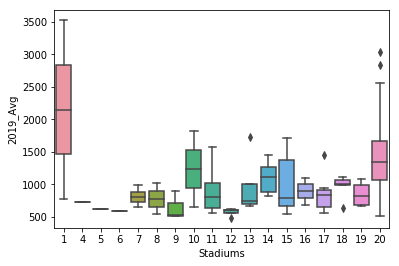

In [50]:
stadium_rent_boxplot = sns.boxplot (x = "Stadiums", y = "2019_Avg", data = master_data_stadium)

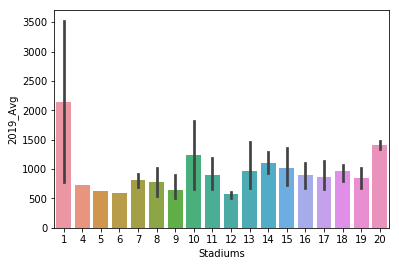

In [52]:
stadium_rent_bar = sns.barplot(x = "Stadiums", y = "2019_Avg", data = master_data_stadium)

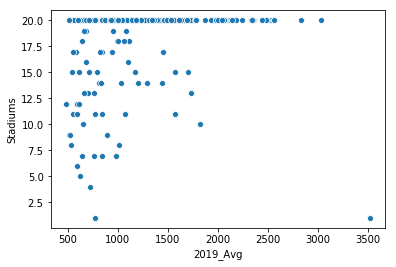

In [55]:
stadium_rent_scatter = sns.scatterplot(x = "2019_Avg", y = "Stadiums", data = master_data_stadium)

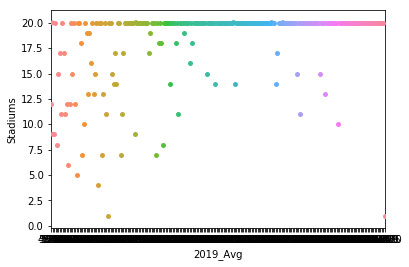

In [56]:
stadium_rent_strip = sns.stripplot( x = "2019_Avg", y = "Stadiums", data = master_data_stadium)

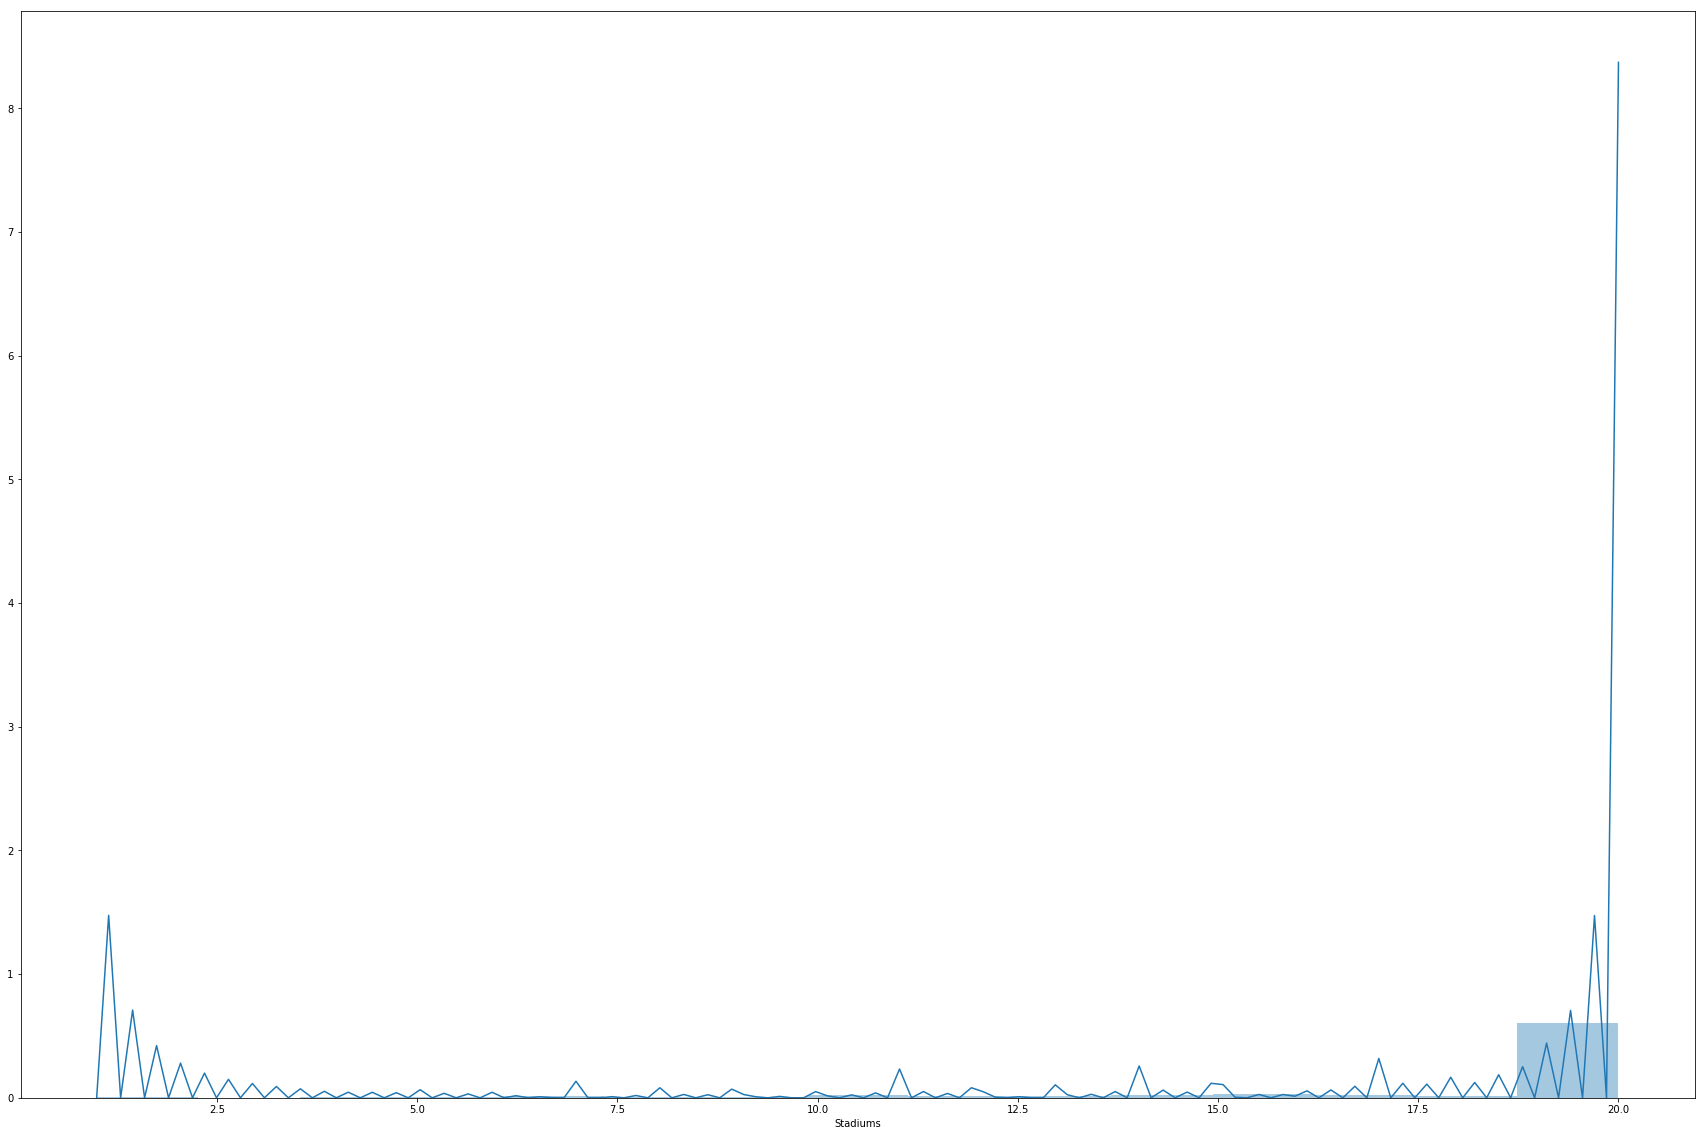

In [60]:
fig, (ax) = plt.subplots(ncols=1, sharey=False, figsize = (30, 20))
sns.distplot(master_data_stadium["Stadiums"])

In [61]:
stadium_grouped = master_data_stadium.groupby(["State", "City"])

In [62]:
stadium_grouped["Stadiums"].value_counts()

State       City              Stadiums
Alabama     Birmingham        20          1
            Mobile            20          1
            Montgomery        12          1
            Tuscaloosa        13          1
Alaska      Anchorage         9           1
Arizona     Chandler          20          1
            Gilbert           20          1
            Glendale          20          1
            Mesa              20          1
            Peoria            20          1
            Phoenix           20          1
            Scottsdale        20          1
            Tempe             20          1
            Tucson            13          1
Arkansas    Little Rock       15          1
California  Anaheim           20          1
            Bakersfield       1           1
            Berkeley          20          1
            Burbank           20          1
            Carlsbad          20          1
            Chula Vista       20          1
            Concord           20     

In [85]:
master_data_stadium = master_data_stadium.drop(columns=[""])

In [89]:
master_data_stadium.to_csv('../Data/clean/master_data_stadium.csv', encoding ="utf-8", index=False)